# October Puzzle Solution 2024

## Puzzle 1

You’re a basketball coach, preparing your defence for the big game against the Spiders. In each play, you can either set your defence to guard the layup (2 pts) or the three-pointer (3 pts). Historically, the Spiders try for layups 60% of the time, and three-pointers 40% of the time. If they try the layup, it goes in 30% of the time if you defend it, and 90% of the time if you don’t. Likewise, if they try the three-pointer, it goes in 25% of the time if you defend it and 50% of the time if you don’t.

**If you’re trying to minimize the amount of points the Spiders score per play, how often should you set up to defend the three-pointer?**

Reference solution in [brilliant](https://brilliantorg.notion.site/September-puzzle-solution-10db4926c48580a2b4f3c0f3859b7907)

Let:

  $x$ - a fraction of the time I defend a three-pointer, then $1 - x$ a fraction of the time I defend the layup
  
  $u(x)$ - the average amount of points the Spiders score per attempt during the play 

During each attempt, the Spiders either try to score 3 points with a probability 0.4 or 2 points with a probability 0.6 at the same time my team either defends the three-pointer with a probability $x$ or the two-pointer with a probability $1 - x$.

Thus the average amount of points the Spiders score per attempt during the play:

$$
u\left( x \right) = 3\cdot 0.4\left[  0.25x+0.5\cdot \left( 1-x \right) \right]+2\cdot 0.6\left[ 0.9x+0.3\left( 1-x \right) \right]
$$

In [5]:
from sympy import *

x = symbols('x')
u = Function('u')(x)
Eq(u, 
   3*0.4*(0.25*x + 0.5*(1 - x)) + 
   2*0.6*(0.90*x + 0.3*(1 - x))
  )

Eq(u(x), 0.42*x + 0.96)

Since $0 \le x \le 1$, minum value of $u = 0.96$ is only possible when $x = 0$. In the other words I should always defend 2 pointer zone.

## Puzzle 2

Seeing your strategy, the Spiders adjust theirs to get an edge. Now, you’re the one who needs to switch things up! Given that the shot percentages are what they are, and knowing that the Spiders will counter-adjust to whatever new strategy you choose—what should your new strategy be?   
 
**How often should you set up to defend the three-pointer versus guarding the layup?**

Let's extend the idea in Puzzle 1 with probabilities:

 $x$ - I defend a three-pointer, then $1 - x$ I defend the layup
 
 $y$ - the Spiders attempt a three-pointer, then $1 - y$ the Spiders attempt a two-pointer

In [9]:
from sympy import *

x_expr = symbols('x')
y_expr = symbols('y')

u_expr = simplify(      
    3*y_expr*(0.25*x_expr + 0.5*(1 - x_expr)) + 
    2*(1 - y_expr)*(0.90*x_expr + 0.3*(1 - x_expr))
)

u_func = lambdify([x_expr, y_expr], u_expr)

Eq(Function('u')(x_expr, y_expr), u_expr)

Eq(u(x, y), -1.95*x*y + 1.2*x + 0.9*y + 0.6)

Let's analyze this function.

### 1. Find Partial Derivatives
Calculate the first-order partial derivatives of $u(x, y)$:

$$
u_x = \frac{\partial u}{\partial x} = -1.95y + 1.2
$$

$$
u_y = \frac{\partial u}{\partial y} = -1.95x + 0.9
$$

### 2. Set Partial Derivatives to Zero
Set the partial derivatives equal to zero to find the critical points:

$$
-1.95y + 1.2 = 0 \quad (1)
$$

$$
-1.95x + 0.9 = 0 \quad (2)
$$

From (1):

$$
y = \frac{1.2}{1.95} \approx 0.6154
$$

From (2):

$$
x = \frac{0.9}{1.95} \approx 0.4615
$$

Thus, we have a critical point at $\left(0.4615, 0.6154\right)$.

### 3. Determine the Nature of Critical Points
To classify the critical points, calculate the second-order partial derivatives:

$$
u_{xx} = \frac{\partial^2 u}{\partial x^2} = 0
$$

$$
u_{yy} = \frac{\partial^2 u}{\partial y^2} = 0
$$

$$
u_{xy} = \frac{\partial^2 u}{\partial x \partial y} = -1.95
$$

Compute the determinant of the Hessian matrix \( H \):

$$
H = \begin{bmatrix}
u_{xx} & u_{xy} \\
u_{xy} & u_{yy}
\end{bmatrix} = \begin{bmatrix}
0 & -1.95 \\
-1.95 & 0
\end{bmatrix}
$$

The determinant of $H$ is calculated as:

$$
det H = u_{xx} u_{yy} - (u_{xy})^2 = 0 \cdot 0 - (-1.95)^2 = -3.8025
$$

### 4. Classify the Critical Point

Since $D < 0$, the critical point $(0.4615, 0.6154)$ is a saddle point.

### Conclusion

Since the function is linear in $y$ for a fixed $x$, we can define a line at $x = 0.4615$ indicating that the function does not changing along this line.
It does not depend on $y$.


In [11]:
x_suddle = 0.9/1.95
Eq(Function('u')(x_suddle, y_expr), u_expr.subs(x_expr, x_suddle))

Eq(u(0.461538461538462, y), 1.15384615384615 - 1.11022302462516e-16*y)

Or

$$
u\left( 0.462, y\right) \simeq  1.154
$$

We gain more insight by plotting the 2D contour lines.

Text(0, 0.5, 'y')

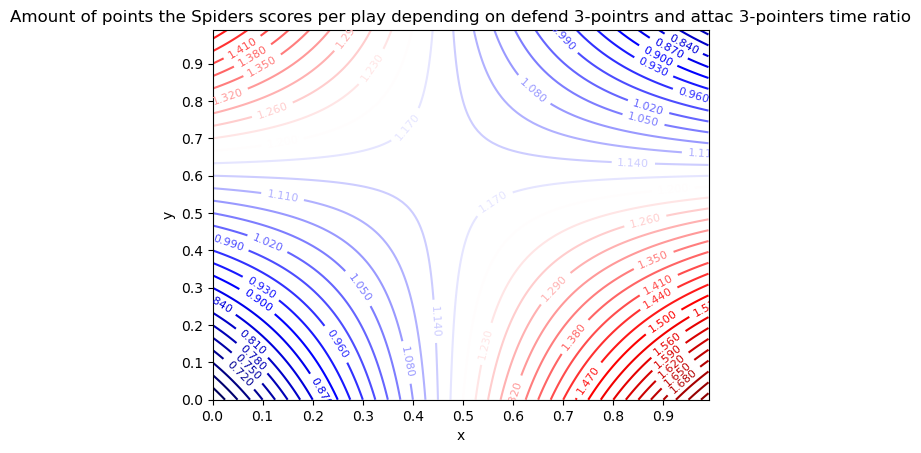

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

X = np.arange(0., 1., 0.01)
Y = np.arange(0., 1., 0.01)

X, Y = np.meshgrid(X, Y)
Z = u_func(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 40, cmap='seismic')
# CS = ax.contourf(X, Y, Z, 40, cmap='coolwarm')
# cbar = fig.colorbar(CS, ax=ax)

ax.set_title('Amount of points the Spiders scores per play depending on defend 3-pointrs and attac 3-pointers time ratio')
ax.clabel(CS, inline=True, fontsize=8)
ax.set_xticks(np.arange(0, 1., 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))
ax.set_xlabel('x')
ax.set_ylabel('y')


The red zones correspond to a higher score by the Spiders, while the blue zones correspond to a lower score. The optimal strategy would be to identify which 
$y$  the spider has chosen and adjust $x$ in such a way as to stay out of the red zones and closer to the blue zones.

Since we want to know how often to set up defenses for the three-pointer versus guarding the layup, we need a single value of $x$. The plot below provides more insights

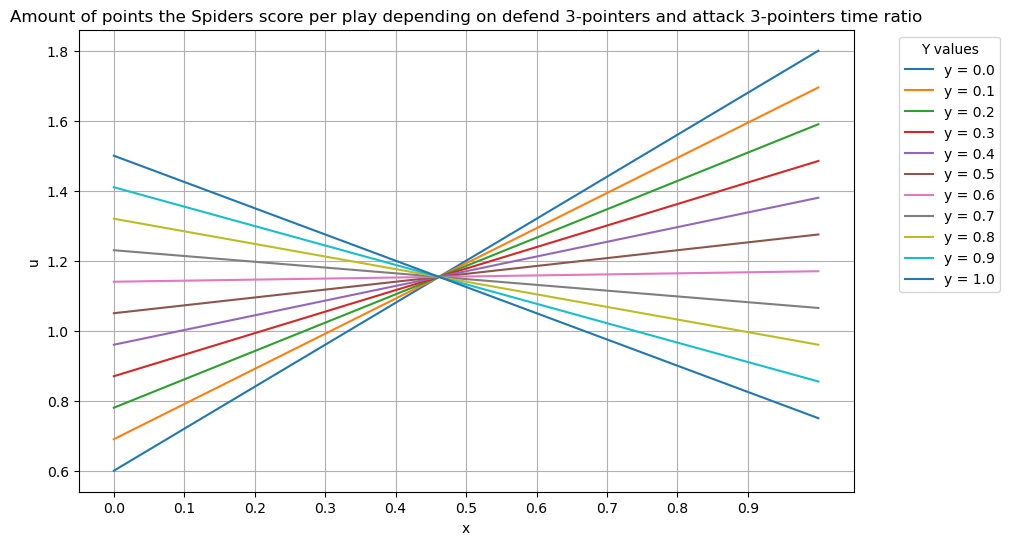

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define x and y values
X = np.arange(0., 1.1, 0.1)
Y = np.arange(0., 1.1, 0.1)  # Different y values for the family of curves

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the family of curves for each fixed value of Y
for y in Y:
    Z = u_func(X, y)
    ax.plot(X, Z, label=f'y = {float(y):.1f}')

# Set title and other settings
ax.set_title('Amount of points the Spiders score per play depending on defend 3-pointers and attack 3-pointers time ratio')
ax.set_xticks(np.arange(0.0, 1.0, 0.1))
ax.set_yticks(np.arange(0.6, 1.8, 0.2)) 
ax.set_xlabel('x')
ax.set_ylabel('u')

# Add legend
ax.legend(title="Y values", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)




Whatvere startegy the Spider would chose defeding three-pointers 46.2% of time will minimize the amount of points the Spiders score per play.